In [1]:
import pandas as pd
import missingno as msno
from fancyimpute import KNN, IterativeImputer

In [2]:
df = pd.read_excel('Testing Data 2021.xlsx')
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Social support
0,Afghanistan,2021,2.436034,NaN,54.549999,0.394306,NaN,0.946299,0.178886,0.606713,0.255620,0.454175
1,Albania,2021,5.255482,9.562287,69.150002,0.827453,0.044742,0.896127,0.553830,0.253654,0.472924,0.701883
2,Algeria,2021,5.217018,9.303516,66.599998,0.558487,-0.111191,0.711900,0.498022,0.257779,NaN,0.840710
3,Argentina,2021,5.908279,9.955421,67.199997,0.819479,-0.008816,0.816257,0.684860,0.345132,0.326574,0.882305
4,Armenia,2021,5.300569,9.500485,67.650002,0.795170,-0.150132,0.705334,0.565782,0.477540,0.297146,0.762044


In [3]:
df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                    8
Healthy life expectancy at birth      3
Freedom to make life choices          1
Generosity                            8
Perceptions of corruption             3
Positive affect                       0
Negative affect                       0
Confidence in national government    11
Social support                        0
dtype: int64

In [4]:
df.isnull().sum()  /  df.shape[0] * 100

Country name                         0.000000
year                                 0.000000
Life Ladder                          0.000000
Log GDP per capita                   6.722689
Healthy life expectancy at birth     2.521008
Freedom to make life choices         0.840336
Generosity                           6.722689
Perceptions of corruption            2.521008
Positive affect                      0.000000
Negative affect                      0.000000
Confidence in national government    9.243697
Social support                       0.000000
dtype: float64

<AxesSubplot:>

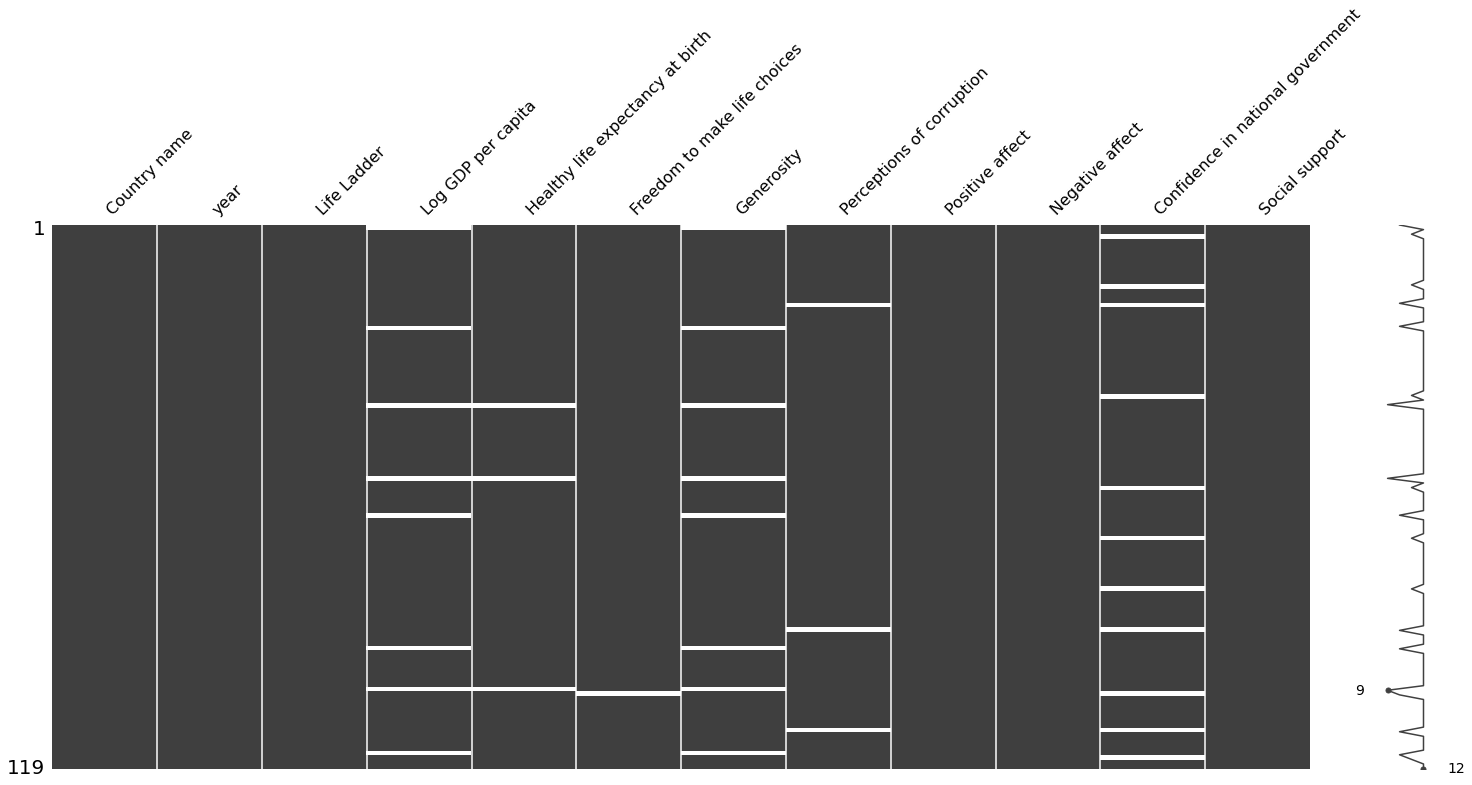

In [5]:
msno.matrix(df)

In [6]:
impute = df.iloc[:,2:]
impute.head()

,Life Ladder,Log GDP per capita,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Social support
0,2.436034,NaN,54.549999,0.394306,NaN,0.946299,0.178886,0.606713,0.255620,0.454175
1,5.255482,9.562287,69.150002,0.827453,0.044742,0.896127,0.553830,0.253654,0.472924,0.701883
2,5.217018,9.303516,66.599998,0.558487,-0.111191,0.711900,0.498022,0.257779,NaN,0.840710
3,5.908279,9.955421,67.199997,0.819479,-0.008816,0.816257,0.684860,0.345132,0.326574,0.882305
4,5.300569,9.500485,67.650002,0.795170,-0.150132,0.705334,0.565782,0.477540,0.297146,0.762044


In [7]:
impute = impute.to_numpy()
impute

array([[ 2.43603444,         nan, 54.54999924, ...,  0.60671258,
         0.25562   ,  0.4541747 ],
       [ 5.25548172,  9.56228733, 69.15000153, ...,  0.25365448,
         0.47292402,  0.70188278],
       [ 5.21701765,  9.30351639, 66.59999847, ...,  0.25777915,
                nan,  0.84071028],
       ...,
       [ 5.54024982,  9.02870178, 65.5       , ...,  0.28043741,
                nan,  0.79949391],
       [ 3.08215499,  8.08762932, 55.25      , ...,  0.34855136,
         0.69767779,  0.61907101],
       [ 3.15457821,  8.15324783, 54.04999924, ...,  0.24168187,
         0.66570318,  0.6851505 ]])

In [8]:
impute = KNN().fit_transform(impute)
impute

Imputing row 1/119 with 2 missing, elapsed time: 0.004
Imputing row 101/119 with 0 missing, elapsed time: 0.004


array([[ 2.43603444,  7.96380454, 54.54999924, ...,  0.60671258,
         0.25562   ,  0.4541747 ],
       [ 5.25548172,  9.56228733, 69.15000153, ...,  0.25365448,
         0.47292402,  0.70188278],
       [ 5.21701765,  9.30351639, 66.59999847, ...,  0.25777915,
         0.45781511,  0.84071028],
       ...,
       [ 5.54024982,  9.02870178, 65.5       , ...,  0.28043741,
         0.51595189,  0.79949391],
       [ 3.08215499,  8.08762932, 55.25      , ...,  0.34855136,
         0.69767779,  0.61907101],
       [ 3.15457821,  8.15324783, 54.04999924, ...,  0.24168187,
         0.66570318,  0.6851505 ]])

In [9]:
impute = pd.DataFrame(impute)

In [10]:
df.iloc[:,2:] = impute

<AxesSubplot:>

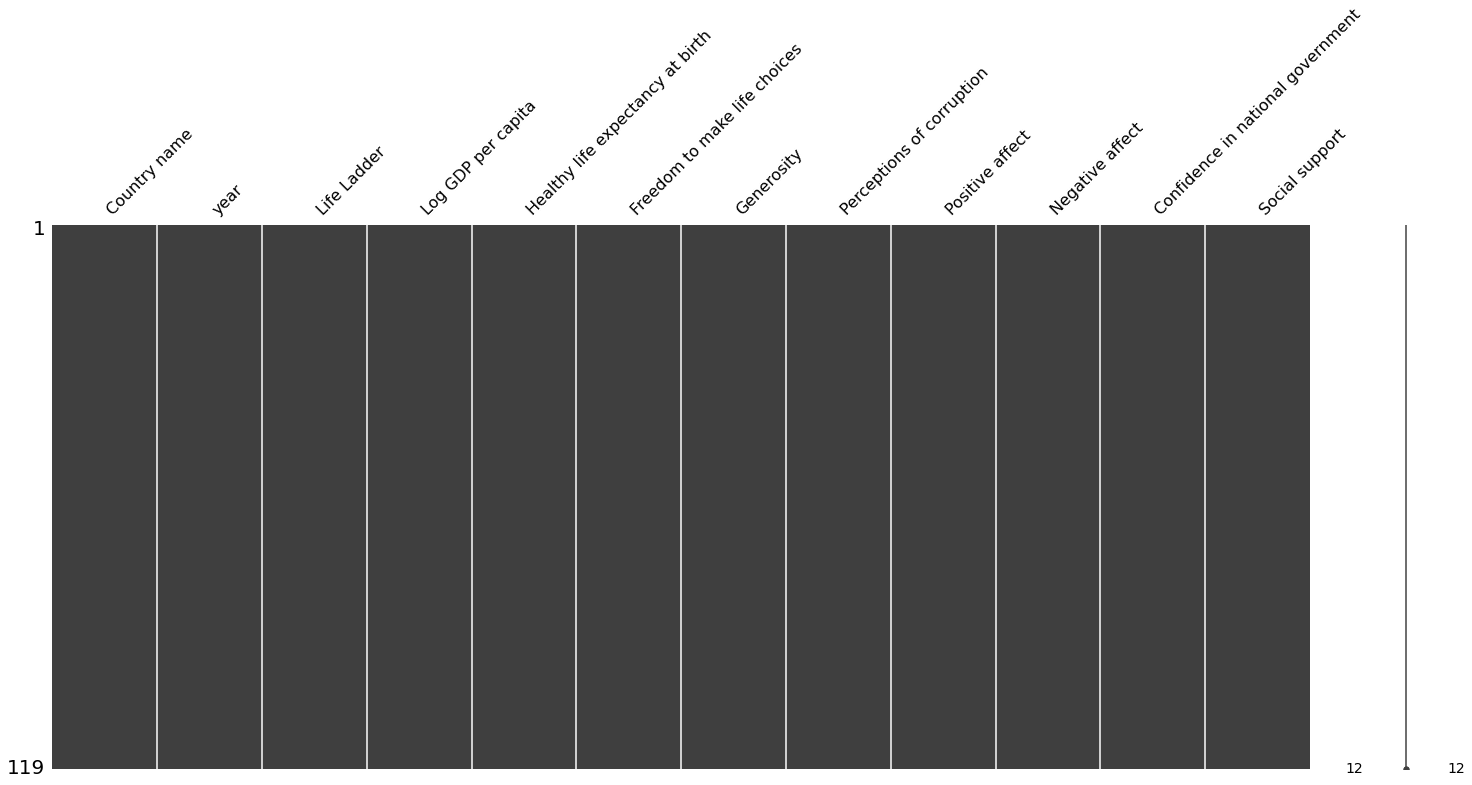

In [11]:
msno.matrix(df)

In [12]:
df.to_excel('TestFull.xlsx')

In [13]:
df = pd.read_excel('Training Data.xlsx')

In [14]:
df.isnull().sum()  /  df.shape[0] * 100

Country name                         0.000000
year                                 0.000000
Life Ladder                          0.000000
Log GDP per capita                   1.079137
Healthy life expectancy at birth     2.997602
Freedom to make life choices         1.079137
Generosity                           1.558753
Perceptions of corruption            6.354916
Positive affect                      0.719424
Negative affect                      0.719424
Confidence in national government    9.712230
Social support                       0.239808
dtype: float64

<AxesSubplot:>

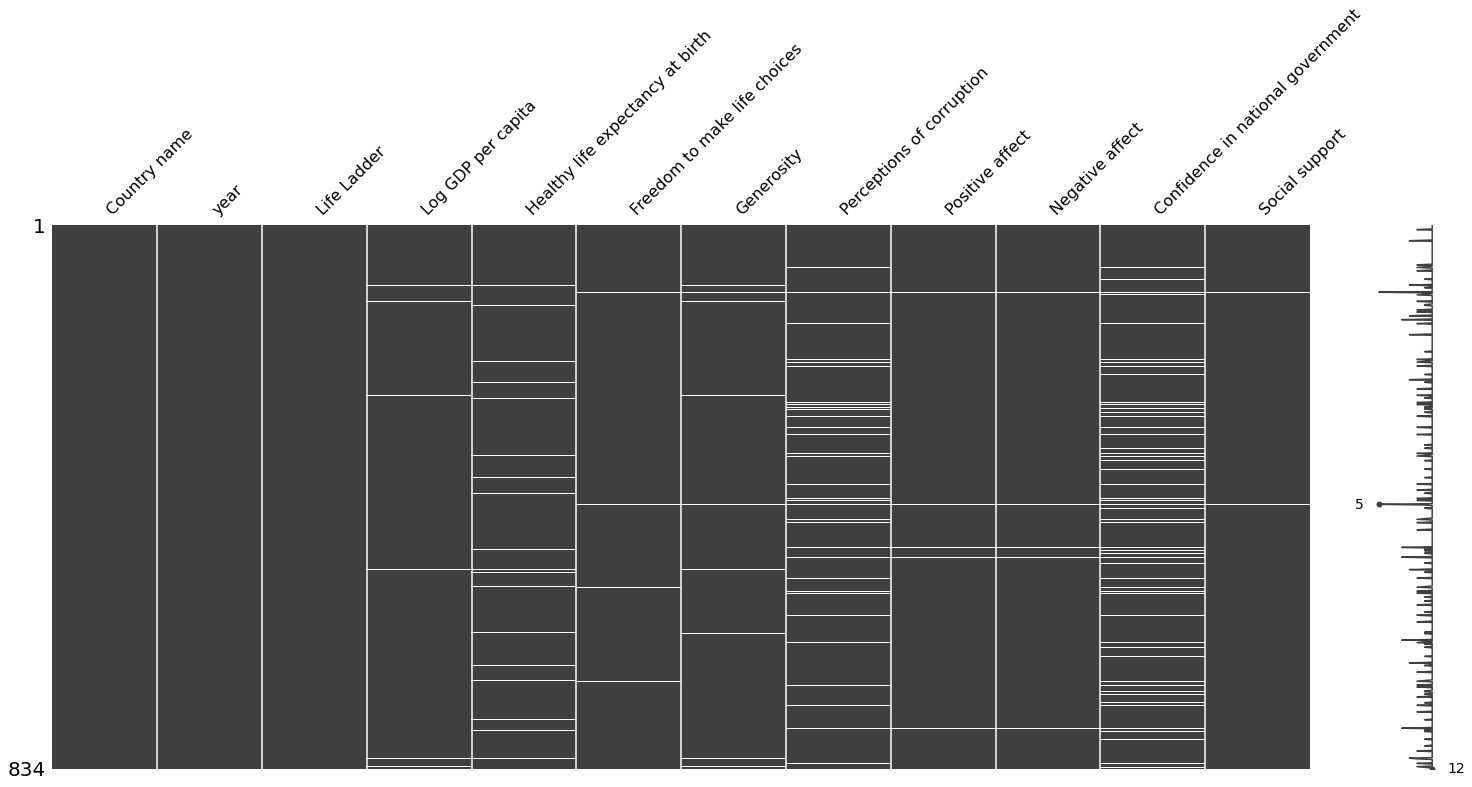

In [15]:
msno.matrix(df)

Imputing row 1/834 with 0 missing, elapsed time: 0.076
Imputing row 101/834 with 0 missing, elapsed time: 0.077
Imputing row 201/834 with 0 missing, elapsed time: 0.078
Imputing row 301/834 with 0 missing, elapsed time: 0.079
Imputing row 401/834 with 0 missing, elapsed time: 0.079
Imputing row 501/834 with 0 missing, elapsed time: 0.080
Imputing row 601/834 with 0 missing, elapsed time: 0.081
Imputing row 701/834 with 0 missing, elapsed time: 0.081
Imputing row 801/834 with 0 missing, elapsed time: 0.082


<AxesSubplot:>

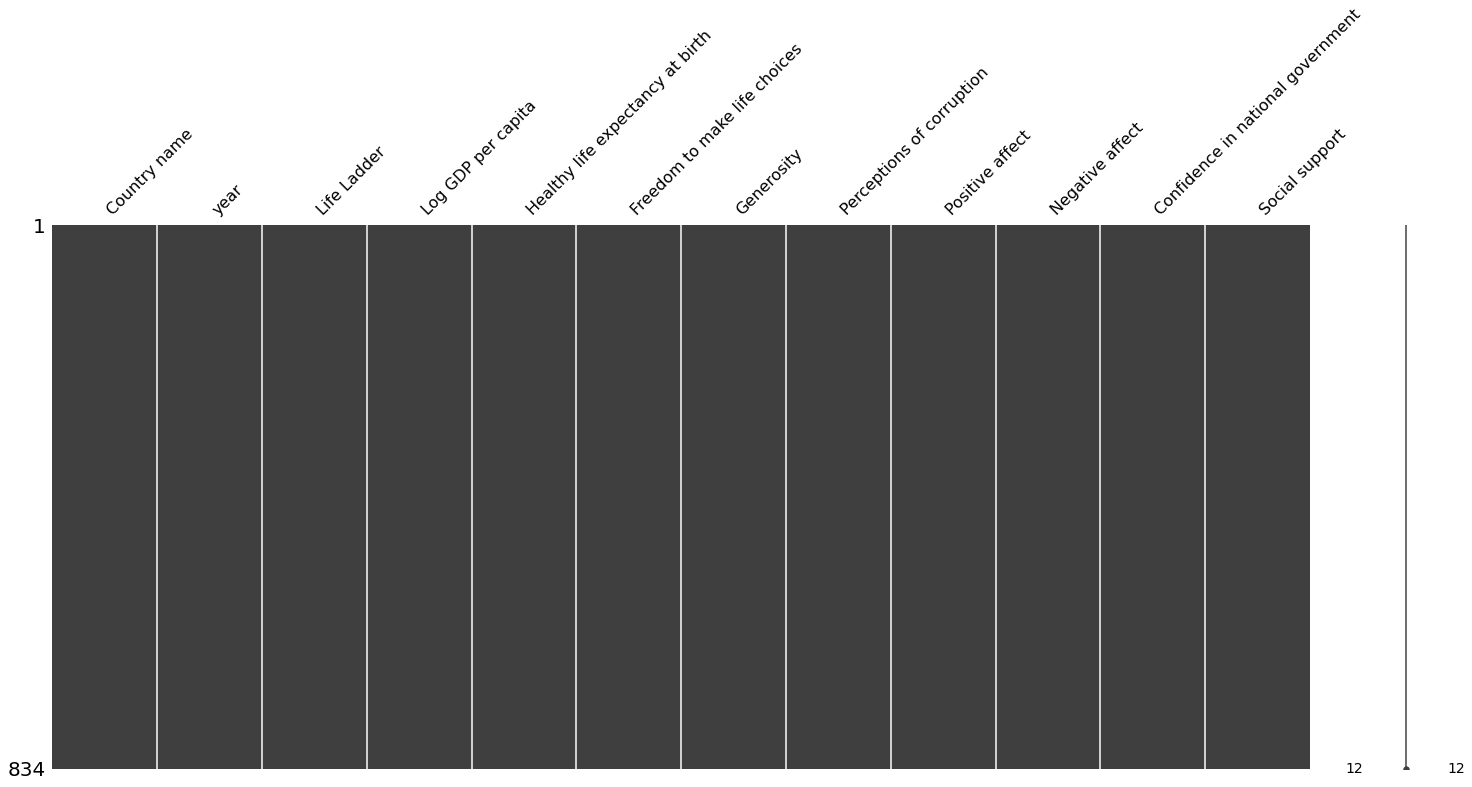

In [16]:
impute = df.iloc[:,2:]
impute = impute.to_numpy()
impute = KNN().fit_transform(impute)
impute = pd.DataFrame(impute)
df.iloc[:,2:] = impute
msno.matrix(df)

In [17]:
df.to_excel('TrainFull.xlsx')